In [130]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [131]:
import tensorflow as tf
from tensorflow import keras

In [132]:
fashion_mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [133]:
X_train_full.dtype

dtype('uint8')

In [134]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.0

In [135]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","bas","Ankle boot"]

In [136]:
class_names[y_train[0]]

'Coat'

In [137]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [138]:
### 위와 동일

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [139]:
from keras.layers import Dense
output_layer = Dense(10)

In [140]:
output_layer

In [141]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [142]:
output_layer

In [143]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_86 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_87 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.layers

In [145]:
hidden1 = model.layers[1]
hidden1.name

'dense_85'

In [146]:
#model.get_layer("dense_3") is hidden1

In [147]:
weights, biases = hidden1.get_weights()

In [148]:
weights

array([[-0.06611895, -0.04285292, -0.04991446, ...,  0.01635542,
         0.0522946 ,  0.06987308],
       [-0.01444269, -0.01625891,  0.07026291, ...,  0.02573326,
         0.0202786 ,  0.07399899],
       [ 0.01596343,  0.02614293,  0.03953838, ..., -0.01385073,
         0.04968605, -0.07376767],
       ...,
       [-0.01109623, -0.04620207,  0.038661  , ...,  0.0399962 ,
        -0.02218523,  0.04632884],
       [ 0.03008482,  0.03423842,  0.06988558, ...,  0.04336458,
         0.03922941,  0.06717154],
       [-0.0246631 ,  0.01145624, -0.00095887, ...,  0.04058941,
        -0.03881373, -0.06533618]], dtype=float32)

In [149]:
### 첫번쨰 층인 784입력층에 300개 은닝층에 대한 가중치이므로 784 * 300

weights.shape

(784, 300)

In [150]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [151]:
biases.shape

(300,)

In [152]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [153]:
### validation_data에 Valid셋을 넣는것 보다는 0.1같은 비율을 넣어 나눠주는게 더 편함

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7049 - accuracy: 0.7686 - val_loss: 0.4932 - val_accuracy: 0.8366
Epoch 2/30
1719/1719 [==============================] - 2s 974us/step - loss: 0.4865 - accuracy: 0.8322 - val_loss: 0.4335 - val_accuracy: 0.8576
Epoch 3/30
1719/1719 [==============================] - 2s 973us/step - loss: 0.4407 - accuracy: 0.8455 - val_loss: 0.4122 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 2s 968us/step - loss: 0.4137 - accuracy: 0.8547 - val_loss: 0.3894 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 2s 1000us/step - loss: 0.3937 - accuracy: 0.8616 - val_loss: 0.3940 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 2s 975us/step - loss: 0.3768 - accuracy: 0.8690 - val_loss: 0.3798 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 2s 971us/step - loss: 0.3648 - accuracy: 0.8723 - val_loss: 0.3565 - 

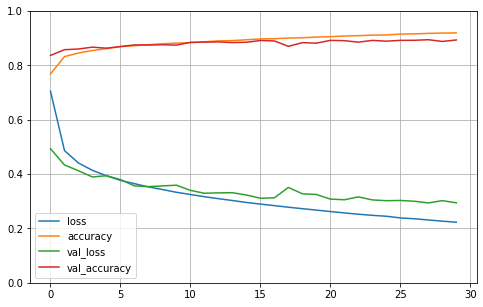

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [155]:
history.history["loss"]

[0.7048557996749878,
 0.48649361729621887,
 0.4407353401184082,
 0.4136509299278259,
 0.39371877908706665,
 0.3767853081226349,
 0.3648030459880829,
 0.3527343273162842,
 0.3431479036808014,
 0.33294177055358887,
 0.3248736262321472,
 0.3166564404964447,
 0.3095068633556366,
 0.3027428984642029,
 0.29550620913505554,
 0.289651483297348,
 0.2838711738586426,
 0.27807411551475525,
 0.2727123200893402,
 0.26747727394104004,
 0.26216691732406616,
 0.25710877776145935,
 0.25229257345199585,
 0.24820072948932648,
 0.24489285051822662,
 0.23868881165981293,
 0.23557578027248383,
 0.23121091723442078,
 0.22676116228103638,
 0.22299735248088837]

In [156]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 713us/step - loss: 0.3233 - accuracy: 0.8833


[0.32329413294792175, 0.8833000063896179]

In [157]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [158]:
### model.predict_classes함수와 같음

y_proba.argmax(axis=1)

array([9, 2, 1], dtype=int64)

In [183]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [191]:
###   input_shape매개변수 형태에 chk'

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
model.save("my_keras.h5")

Epoch 1/20
363/363 [==============================] - 0s 732us/step - loss: 0.8713 - val_loss: 0.8894
Epoch 2/20
363/363 [==============================] - 0s 671us/step - loss: 0.5258 - val_loss: 0.4726
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4526 - val_loss: 0.4366
Epoch 4/20
363/363 [==============================] - 0s 607us/step - loss: 0.4280 - val_loss: 0.4232
Epoch 5/20
363/363 [==============================] - 0s 594us/step - loss: 0.4121 - val_loss: 0.4091
Epoch 6/20
363/363 [==============================] - 0s 592us/step - loss: 0.4011 - val_loss: 0.3987
Epoch 7/20
363/363 [==============================] - 0s 542us/step - loss: 0.3931 - val_loss: 0.3946
Epoch 8/20
363/363 [==============================] - 0s 569us/step - loss: 0.3859 - val_loss: 0.3967
Epoch 9/20
363/363 [==============================] - 0s 546us/step - loss: 0.3816 - val_loss: 0.3866
Epoch 10/20
363/363 [==============================] - 0s 695us/step - loss: 0.3765 

In [189]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 770us/step - loss: 2.8126 - val_loss: 0.9845
Epoch 2/20
363/363 [==============================] - 0s 579us/step - loss: 0.8542 - val_loss: 0.7247
Epoch 3/20
363/363 [==============================] - 0s 596us/step - loss: 0.7326 - val_loss: 0.6723
Epoch 4/20
363/363 [==============================] - 0s 646us/step - loss: 0.6809 - val_loss: 0.6345
Epoch 5/20
363/363 [==============================] - 0s 670us/step - loss: 0.6412 - val_loss: 0.5996
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6087 - val_loss: 0.5749
Epoch 7/20
363/363 [==============================] - 0s 828us/step - loss: 0.5812 - val_loss: 0.5492
Epoch 8/20
363/363 [==============================] - 0s 851us/step - loss: 0.5584 - val_loss: 0.5319
Epoch 9/20
363/363 [==============================] - 0s 791us/step - loss: 0.5384 - val_loss: 0.5120
Epoch 10/20
363/363 [==============================] - 0s 824us/step - loss: 0.5221 

In [162]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs = [output])

In [163]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
  1/363 [..............................] - ETA: 55s - loss: 5.8660

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


363/363 [==============================] - 0s 817us/step - loss: 2.4118 - val_loss: 1.1045
Epoch 2/20
363/363 [==============================] - 0s 608us/step - loss: 0.9074 - val_loss: 0.7465
Epoch 3/20
363/363 [==============================] - 0s 602us/step - loss: 0.6970 - val_loss: 0.6797
Epoch 4/20
363/363 [==============================] - 0s 647us/step - loss: 0.6549 - val_loss: 0.6490
Epoch 5/20
363/363 [==============================] - 0s 643us/step - loss: 0.6329 - val_loss: 0.6290
Epoch 6/20
363/363 [==============================] - 0s 601us/step - loss: 0.6164 - val_loss: 0.6155
Epoch 7/20
363/363 [==============================] - 0s 643us/step - loss: 0.6059 - val_loss: 0.6003
Epoch 8/20
363/363 [==============================] - 0s 641us/step - loss: 0.5925 - val_loss: 0.5902
Epoch 9/20
363/363 [==============================] - 0s 647us/step - loss: 0.5824 - val_loss: 0.5777
Epoch 10/20
363/363 [==============================] - 0s 604us/step - loss: 0.5768 - val_los

In [164]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_split=0.1)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
327/327 [==============================] - 0s 822us/step - loss: 0.5201 - val_loss: 0.5350
Epoch 2/20
327/327 [==============================] - 0s 624us/step - loss: 0.5157 - val_loss: 0.5366
Epoch 3/20
327/327 [==============================] - 0s 566us/step - loss: 0.5144 - val_loss: 0.5326
Epoch 4/20
327/327 [==============================] - 0s 601us/step - loss: 0.5111 - val_loss: 0.5348
Epoch 5/20
327/327 [==============================] - 0s 510us/step - loss: 0.5081 - val_loss: 0.5268
Epoch 6/20
327/327 [==============================] - 0s 667us/step - loss: 0.5059 - val_loss: 0.5241
Epoch 7/20
327/327 [==============================] - 0s 791us/step - loss: 0.5027 - val_loss: 0.5218
Epoch 8/20
327/327 [==============================] - 0s 754us/step - loss: 0.5018 - val_loss: 0.5202
Epoch 9/20
327/327 [==============================] - 0s 730us/step - loss: 0.5002 - val_loss: 0.5203
Epoch 10/20
327/327 [==============================] - 0s 667us/step - loss: 0.497

In [165]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [166]:
model.compile(loss=["mse", "mse"], loss_weights = [0.9, 0.1], optimizer="sgd")

In [167]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9321 - main_output_loss: 0.8346 - aux_output_loss: 1.8094 - val_loss: 0.8301 - val_main_output_loss: 0.7912 - val_aux_output_loss: 1.1797
Epoch 2/20
363/363 [==============================] - 0s 821us/step - loss: 0.7467 - main_output_loss: 0.7071 - aux_output_loss: 1.1028 - val_loss: 0.5426 - val_main_output_loss: 0.4966 - val_aux_output_loss: 0.9562
Epoch 3/20
363/363 [==============================] - 0s 873us/step - loss: 0.5580 - main_output_loss: 0.5177 - aux_output_loss: 0.9205 - val_loss: 0.5016 - val_main_output_loss: 0.4679 - val_aux_output_loss: 0.8052
Epoch 4/20
363/363 [==============================] - 0s 867us/step - loss: 0.5311 - main_output_loss: 0.5000 - aux_output_loss: 0.8111 - val_loss: 0.4845 - val_main_output_loss: 0.4570 - val_aux_output_loss: 0.7324
Epoch 5/20
363/363 [==============================] - 0s 885us/step - loss: 0.4996 - main_output_loss: 0.4724 - aux_output_loss: 0.7445 - 

In [168]:
total_loss ,main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 581us/step - loss: 0.3762 - main_output_loss: 0.3631 - aux_output_loss: 0.4947


In [169]:
y_pred_main, y_pre_aux = model.predict([X_new_A, X_new_B])

In [170]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers,Dense(1)
        self.aux_output = keras.layers,Dense(1)        
        
        def call(self, inputs):
            input_A, input_B = inputs
            hidden1 = self.hidden1(input_B)
            hidden2 = self.hidden2(hidden1)
            concat = keras.layers.concatenate([input_A, hidden2])
            main_output = self.main_output(concat)
            aux_output = self.aux_output(hidden2)
            return main_output, aux_output
model = WideAndDeepModel()

In [176]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
363/363 [==============================] - 1s 488us/step - loss: 1.4570
Epoch 2/10
363/363 [==============================] - 0s 436us/step - loss: 552030871486464.0000
Epoch 3/10
363/363 [==============================] - 0s 454us/step - loss: 6255827968.0000
Epoch 4/10
363/363 [==============================] - 0s 444us/step - loss: 190371479552.0000
Epoch 5/10
363/363 [==============================] - 0s 460us/step - loss: 4468098203648.0000
Epoch 6/10
363/363 [==============================] - 0s 427us/step - loss: 176506126991360.0000
Epoch 7/10
363/363 [==============================] - 0s 466us/step - loss: 4634225152098304.0000
Epoch 8/10
363/363 [==============================] - 0s 445us/step - loss: 164846479817572352.0000
Epoch 9/10
363/363 [==============================] - 0s 432us/step - loss: 6947104790916628480.0000
Epoch 10/10
363/363 [==============================] - 0s 431us/step - loss: 169746686483221184512.0000


In [197]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10)
model.save("my_keras.h5")

Epoch 1/10
363/363 [==============================] - 0s 493us/step - loss: 2.0000
Epoch 2/10
363/363 [==============================] - 0s 433us/step - loss: 0.8090
Epoch 3/10
363/363 [==============================] - 0s 422us/step - loss: 0.7199
Epoch 4/10
363/363 [==============================] - 0s 429us/step - loss: 0.6830
Epoch 5/10
363/363 [==============================] - 0s 427us/step - loss: 0.6576
Epoch 6/10
363/363 [==============================] - 0s 433us/step - loss: 0.6341
Epoch 7/10
363/363 [==============================] - 0s 489us/step - loss: 0.6151
Epoch 8/10
363/363 [==============================] - 0s 455us/step - loss: 0.5970
Epoch 9/10
363/363 [==============================] - 0s 437us/step - loss: 0.5805
Epoch 10/10
363/363 [==============================] - 0s 456us/step - loss: 0.5656


In [198]:
checkpoint = keras.callbacks.ModelCheckpoint("my_keras.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint])

Epoch 1/10
363/363 [==============================] - 0s 515us/step - loss: 0.5502
Epoch 2/10
363/363 [==============================] - 0s 453us/step - loss: 0.5388
Epoch 3/10
363/363 [==============================] - 0s 453us/step - loss: 0.5260
Epoch 4/10
363/363 [==============================] - 0s 464us/step - loss: 0.5148
Epoch 5/10
363/363 [==============================] - 0s 493us/step - loss: 0.5049
Epoch 6/10
363/363 [==============================] - 0s 461us/step - loss: 0.4950
Epoch 7/10
363/363 [==============================] - 0s 602us/step - loss: 0.4863
Epoch 8/10
363/363 [==============================] - 0s 452us/step - loss: 0.4784
Epoch 9/10
363/363 [==============================] - 0s 464us/step - loss: 0.4707
Epoch 10/10
363/363 [==============================] - 0s 482us/step - loss: 0.4639
